## Imports

In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn import svm

## For TEST Predictions

In [2]:
test = pd.read_csv('dataset/test.csv')

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Repeat preprocessing steps similar to train

In [3]:
#numercial features
numerical_features_test = [feature for feature in test.columns if test[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_test))

Number of numerical variables:  281


In [4]:
#discrete numercial features
discrete_feature_test=[feature for feature in numerical_features_test if len(test[feature].unique())<25 ]

# test=replace_cat_feature(test,cat_features_nan1)
# test
len(discrete_feature_test)

278

In [5]:
#list of continuous numerical features
continuous_features_test=[feature for feature in numerical_features_test if feature not in discrete_feature_test]

print("Continuous features Count {}".format(len(continuous_features_test)))
continuous_features_test

Continuous features Count 3


['rank', 'respondentOrderEng', 'sharepointid']

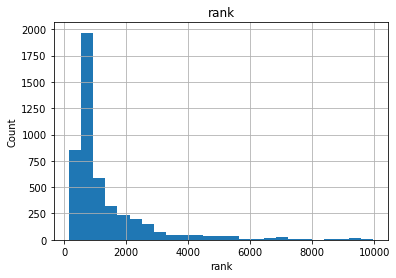

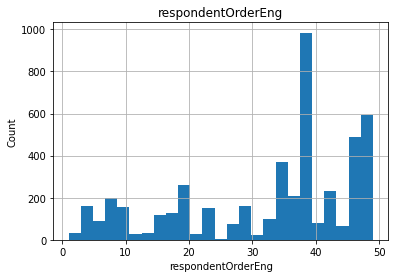

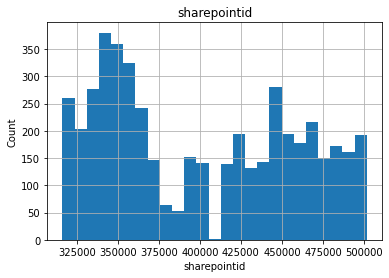

In [6]:
#visualize categorical features
for feature in continuous_features_test:
    data=test.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [7]:
#categorical variables
categorical_features_test=[feature for feature in test.columns if test[feature].dtypes=='O' and feature not in ['appno']]
len(categorical_features_test)

45

In [8]:
for feature in categorical_features_test:
    print('The feature is {} and number of categories are {}'.format(feature,len(test[feature].unique())))

The feature is application and number of categories are 1
The feature is country.alpha2 and number of categories are 46
The feature is country.name and number of categories are 46
The feature is decisiondate and number of categories are 183
The feature is docname and number of categories are 4727
The feature is doctypebranch and number of categories are 3
The feature is ecli and number of categories are 4760
The feature is introductiondate and number of categories are 295
The feature is issue.0 and number of categories are 1148
The feature is issue.1 and number of categories are 643
The feature is issue.10 and number of categories are 9
The feature is issue.11 and number of categories are 9
The feature is issue.12 and number of categories are 7
The feature is issue.13 and number of categories are 5
The feature is issue.14 and number of categories are 5
The feature is issue.15 and number of categories are 5
The feature is issue.16 and number of categories are 4
The feature is issue.17 a

In [9]:
# Check for Categorical features which are missing
cat_features_test_nan=[feature for feature in test.columns if test[feature].isnull().sum()>1 and test[feature].dtypes=='O']

print("Out of the total {} categorical features, {} of them have null values as mentioned below:\n".format(len(categorical_features_test),len(cat_features_test_nan)))
for feature in cat_features_test_nan:
    print("{}: {}% missing values".format(feature,np.round(test[feature].isnull().mean(),4)))


Out of the total 45 categorical features, 31 of them have null values as mentioned below:

decisiondate: 0.9246% missing values
introductiondate: 0.9244% missing values
issue.0: 0.742% missing values
issue.1: 0.8586% missing values
issue.10: 0.9983% missing values
issue.11: 0.9983% missing values
issue.12: 0.9987% missing values
issue.13: 0.9992% missing values
issue.14: 0.9992% missing values
issue.15: 0.9992% missing values
issue.16: 0.9994% missing values
issue.17: 0.9996% missing values
issue.18: 0.9996% missing values
issue.19: 0.9996% missing values
issue.2: 0.9248% missing values
issue.20: 0.9996% missing values
issue.21: 0.9998% missing values
issue.22: 0.9998% missing values
issue.23: 0.9998% missing values
issue.3: 0.9565% missing values
issue.4: 0.9775% missing values
issue.5: 0.9857% missing values
issue.6: 0.9916% missing values
issue.7: 0.9935% missing values
issue.8: 0.9966% missing values
issue.9: 0.9979% missing values
parties.1: 0.0004% missing values
respondent.1: 0.

In [10]:
# Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

In [11]:
test=replace_cat_feature(test,cat_features_test_nan)

In [12]:
test.head(2)

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,issue.1,issue.10,issue.11,issue.12,issue.13,issue.14,issue.15,issue.16,issue.17,issue.18,issue.19,issue.2,issue.20,issue.21,issue.22,issue.23,issue.24,issue.25,issue.26,issue.3,issue.4,issue.5,issue.6,issue.7,issue.8,issue.9,itemid,judgementdate,kpdate,languageisocode,originatingbody,originatingbody_name,originatingbody_type,parties.0,parties.1,parties.2,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs

In [13]:

#check if numerical variables the contains missing values
numerical_with_test_nan=[feature for feature in test.columns if test[feature].isnull().sum()>1 and test[feature].dtypes!='O']

numerical_with_test_nan

['issue.24', 'issue.25', 'issue.26', 'parties.2']

In [14]:
# Replacing the numerical Missing Values
for feature in numerical_with_test_nan:
    
    # We will replace by using median since there are outliers
    median_value=test[feature].median()
    test[feature].fillna(median_value)
    
test[numerical_with_test_nan].isnull().sum()

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


issue.24     4760
issue.25     4760
issue.26     4760
parties.2    4760
dtype: int64

In [15]:
#Convert the skewed distribution of continuous features into normal distribution
for feature in continuous_features_test:
    test[feature]=np.log(test[feature])

In [16]:
test[continuous_features_test]

,rank,respondentOrderEng,sharepointid
0,6.678049,3.496508,12.791423
1,7.278554,3.871201,12.984670
2,6.766467,3.091042,12.785992
3,6.931614,3.637586,12.971803
4,6.511541,3.637586,12.773041
...,...,...,...
4755,7.425834,3.637586,13.028327
4756,7.057837,3.761200,12.870566
4757,6.793879,3.610918,12.822306
4758,7.880998,2.944439,13.074693


In [17]:
#Replace the labels in categorical which occur less than 1% by Rare_label 
for feature in categorical_features_test:
    temp=test[feature].value_counts(normalize=True)
    #print(temp)
    temp_df=temp[temp>0.01].index
    #print(temp_df)
    test[feature]=np.where(test[feature].isin(temp_df),test[feature],'Rare_label')

In [18]:
train_dummy = []
# Get train dummy columns from the file
with open('train_dummy_columns.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        current_col = line[:-1]
        # add item to the list
        train_dummy.append(current_col)

In [19]:
# Get dummiesfor the test
test_dummy = pd.get_dummies(test.drop(['appno'],axis=1), prefix_sep='_', drop_first=True)
test_dummy = test_dummy.reindex(columns=train_dummy).fillna(0)
test_dummy

,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,c

In [20]:
#feature scaling
scaling_feature=[feature for feature in test_dummy.columns if feature not in ['appno','importance'] ]
len(scaling_feature)

417

In [23]:
#reading the scaler pickle
with open('scaler.pkl','rb') as f:
    scaler = pickle.load(f)

In [22]:
#concatenate all features in one variable
test_data = pd.concat([test[['appno']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_dummy[scaling_feature]), columns=scaling_feature)],
                    axis=1)
test_data

,appno,originatingbody,rank,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_articl

In [26]:
#reading the model pickle
with open('svm_model.pkl','rb') as f:
    svm_clf = pickle.load(f)

In [27]:
selected_features = []
# Get selected features from the file
with open('selected_features.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        current_col = line[:-1]
        # add item to the list
        selected_features.append(current_col)

In [28]:
test_data=test_data[selected_features]
predictions=svm_clf.predict(test_data)

In [29]:
output=pd.DataFrame(test['appno'])

In [30]:
output['importance']=predictions

In [31]:
output

,appno,importance
0,1194/04,4
1,53865/11,4
2,43838/07,4
3,11157/04,3
4,42443/02,3
...,...,...
4755,4345/06,4
4756,10761/09,4
4757,805/09,4
4758,44711/16,4


In [32]:
output.to_csv('importance.csv',index=False)